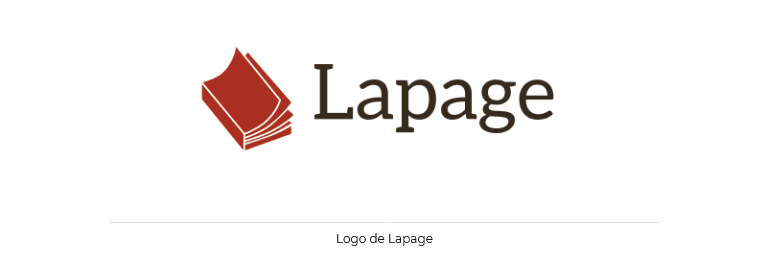

# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import scipy.stats  as sp
from datetime import datetime, date
import statsmodels.api as sm
import statsmodels.formula.api as smf
# librairies graphiques
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

*Tous les fichiers utilisés sont au format csv avant d'être importés.*

# Fichier *customers*

## Importation du fichier et information

In [2]:
customers = pd.read_csv('customers.csv')
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [3]:
customers.shape

(8623, 3)

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


Les informations du fichier nous montrent qu'il faut convertir la colonne *birth* en datetime.

## Nettoyage du fichier

<span style='color:teal'>**Taux de valeurs manquantes**</span>

In [5]:
customers.isna().mean()

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

Il n'y a pas de valeurs manquantes.

<span style='color:teal'>**Recherche de doublons**</span>

On se focalise sur la colonne *client_id* car c'est un identifiant unique pour chaque client.

In [6]:
customers.duplicated('client_id').sum()

0

Pas de doublons.

## Conversion de la colonne *birth* en datetime

In [7]:
customers['birth'] = pd.to_datetime(customers['birth'], format = '%Y')

<span style='color:teal'>**Vérification de la modification**</span>

In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   client_id  8623 non-null   object        
 1   sex        8623 non-null   object        
 2   birth      8623 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 202.2+ KB


# Fichier *products*

## Importation du fichier et information

In [9]:
products = pd.read_csv('products.csv')
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [10]:
products.shape

(3287, 3)

In [11]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


## Nettoyage du fichier

<span style='color:teal'>**Taux de valeurs manquantes**</span>

In [12]:
products.isna().mean()

id_prod    0.0
price      0.0
categ      0.0
dtype: float64

<span style='color:teal'>**Valeurs nulles et négatives**</span>

In [13]:
products.sort_values('price')

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


La ligne 731 a une référence produit différente des autres et un tarif négatif, je la supprime de mon fichier.

In [14]:
# Suppression de la ligne 
products.drop(index = [731], inplace=True)

In [15]:
# Vérification
products.sort_values('price')

,id_prod,price,categ
2272,0_528,0.62,0
2355,0_202,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
1530,0_1620,0.80,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


<span style='color:teal'>**Recherche de doublons**</span>

La recherche est réalisée sur la colonne *id_prod* car c'est l'identifiant unique de chaque produit.

In [16]:
products.duplicated('id_prod').sum()

0

Pas de valeurs manquantes ni de doublons.

# Fichier *transactions*

## Importation du fichier et information

In [17]:
transactions = pd.read_csv('transactions.csv')
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [18]:
transactions.shape

(679532, 4)

In [19]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


On remarque que la colonne *date* est à convertir car elle n'est pas de type datetime.

## Nettoyage du fichier

<span style='color:teal'>**Taux de valeurs manquantes**</span>

In [20]:
transactions.isna().mean()

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

Pas de valeurs manquantes.

<span style='color:teal'>**Recherche de doublons**</span>

In [21]:
transactions.duplicated().sum()

126

<span style='color:teal'>**Visualisation des doublons**</span>

In [22]:
transactions[transactions.duplicated(keep=False)].sort_values('session_id')

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
425944,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
427604,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
430174,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1
431570,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_1
...,...,...,...,...
237649,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
238625,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
245235,T_0,test_2021-03-01 02:30:02.237415,s_0,ct_1
254282,T_0,test_2021-03-01 02:30:02.237438,s_0,ct_0


On observe que les doublons correspondent à des sessions **"test"**. 
> - Ce ne sont donc pas des achats réels, on peut les supprimer sans influencer les résultats de l'analyse à venir.
> - Les identifiants 'T_0', 's_0' et 'ct_0' sont fictifs car reliés aux achats 'test'. Ils ne sont pas à prendre en compte non plus.

On peut supprimer les doublons à présent.

<span style='color:teal'>**Suppression des doublons**</span>

In [23]:
transactions.drop_duplicates(inplace=True)

In [24]:
transactions.shape

(679406, 4)

## Conversion de la colonne *date* en datetime

In [25]:
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')
# Le terme 'coerce' permet de transformer les valeurs non conformes en NaN

In [26]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


<span style='color:teal'>**Vérification**</span>

In [27]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679406 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679406 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679406 non-null  object        
 3   client_id   679406 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


La conversion s'est bien opérée mais, il y a maintenant 74 valeurs nulles dans les colonnes *date*.

In [28]:
transactions.dropna(inplace=True)

<span style='color:teal'>**Nouvelle vérification**</span>

In [29]:
transactions.shape

(679332, 4)

In [30]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


# Jointure des fichiers

On commence par faire une jointure entre les fichiers *customers* et *transactions*. Puis une seconde jointures avec le résultat de la première jointure et le fichier *products*.

Le fichier *transactions* est notre lien, il comporte les colonnes communes aux deux autres fichiers.

## Jointure du fichier *customers* et *transactions*

In [31]:
transactions_customers = pd.merge(customers, transactions, on='client_id')

In [32]:
transactions_customers.head()

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967-01-01,0_1316,2021-12-29 09:11:18.860592,s_141762
1,c_4410,f,1967-01-01,1_385,2021-03-22 01:40:22.782925,s_9707
2,c_4410,f,1967-01-01,1_190,2021-11-12 18:11:43.280574,s_118628
3,c_4410,f,1967-01-01,0_1455,2021-03-22 14:29:25.189266,s_9942
4,c_4410,f,1967-01-01,1_483,2022-03-13 21:35:55.949042,s_178686


In [33]:
transactions_customers.shape

(679332, 6)

In [34]:
transactions_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   679332 non-null  object        
 1   sex         679332 non-null  object        
 2   birth       679332 non-null  datetime64[ns]
 3   id_prod     679332 non-null  object        
 4   date        679332 non-null  datetime64[ns]
 5   session_id  679332 non-null  object        
dtypes: datetime64[ns](2), object(4)
memory usage: 36.3+ MB


## Jointure de *transactions_customers* avec *products*

In [35]:
ventes = pd.merge(products, transactions_customers, on='id_prod')

In [36]:
ventes.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id
0,0_1421,19.99,0,c_5152,f,1986-01-01,2021-04-17 06:09:37.424812,s_21727
1,0_1421,19.99,0,c_2167,f,1960-01-01,2021-11-24 00:28:06.088699,s_124134
2,0_1421,19.99,0,c_2167,f,1960-01-01,2022-08-24 00:28:06.088699,s_257560
3,0_1421,19.99,0,c_3060,m,1971-01-01,2021-04-06 09:35:05.954975,s_16742
4,0_1421,19.99,0,c_3060,m,1971-01-01,2022-03-06 09:35:05.954975,s_175117


In [37]:
ventes.shape

(679111, 8)

In [38]:
ventes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   price       679111 non-null  float64       
 2   categ       679111 non-null  int64         
 3   client_id   679111 non-null  object        
 4   sex         679111 non-null  object        
 5   birth       679111 non-null  datetime64[ns]
 6   date        679111 non-null  datetime64[ns]
 7   session_id  679111 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 46.6+ MB


## Nettoyage de *ventes*

<span style='color:teal'>**Taux de valeurs manquantes**<span>

In [39]:
ventes.isna().mean()

id_prod       0.0
price         0.0
categ         0.0
client_id     0.0
sex           0.0
birth         0.0
date          0.0
session_id    0.0
dtype: float64

<span style='color:teal'>**Recherche de doublons**</span>

A priori, une vente correspond à une session, donc on regarde les doublons via **'session_id'**.

In [40]:
ventes['session_id'].duplicated().sum()

336836

In [41]:
ventes.sort_values(by = 'session_id')

,id_prod,price,categ,client_id,sex,birth,date,session_id
216784,0_1259,11.99,0,c_329,f,1967-01-01,2021-03-01 00:01:07.843138,s_1
139085,1_635,26.99,1,c_2218,f,1970-01-01,2021-03-01 00:10:33.163037,s_10
407241,0_1451,19.99,0,c_3854,f,1978-01-01,2021-03-01 04:43:58.025677,s_100
386154,0_1030,13.73,0,c_3854,f,1978-01-01,2021-03-01 04:12:43.572994,s_100
88736,0_1590,18.93,0,c_1014,m,1989-01-01,2021-03-03 02:49:03.169115,s_1000
...,...,...,...,...,...,...,...,...
249177,0_1609,18.99,0,c_4900,f,1974-01-01,2021-10-04 18:39:10.485474,s_99996
47175,0_1197,6.99,0,c_3521,f,1979-01-01,2021-10-04 18:45:38.003516,s_99997
268781,0_1411,8.99,0,c_2795,f,1978-01-01,2021-10-04 18:50:59.099942,s_99998
549226,0_1572,8.61,0,c_2795,f,1978-01-01,2021-10-04 18:45:54.374885,s_99998


>Je ne supprime pas les doublons de session car ils contiennent des références produits différentes pour la plupart. Une même session peut concerner plusieurs produits mais un seul client. Une session peut aussi être étalée sur plusieurs jours, mais ça n'est pas significatif pour altérer nos résultats.

Maintenant que notre dataframe *ventes* est créé, on peut procéder à l'analyse des différents indicateurs.

# Analyse des indicateurs des ventes

## Chiffre d'affaire

Pour faciliter la visualisation de l'évolution du chiffre d'affaire dans le temps. Je vais créer différents graphiques.

### Chiffre d'affaire global

<span style='color:teal'>**Chiffre d'affaire total dans le temps**</span>

In [42]:
# Modification de la colonne date en gardant seulement le format AAAA-MM-JJ
ventes['date'] = pd.to_datetime(ventes["date"].dt.strftime('%Y-%m-%d'))
ventes.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id
0,0_1421,19.99,0,c_5152,f,1986-01-01,2021-04-17,s_21727
1,0_1421,19.99,0,c_2167,f,1960-01-01,2021-11-24,s_124134
2,0_1421,19.99,0,c_2167,f,1960-01-01,2022-08-24,s_257560
3,0_1421,19.99,0,c_3060,m,1971-01-01,2021-04-06,s_16742
4,0_1421,19.99,0,c_3060,m,1971-01-01,2022-03-06,s_175117


In [43]:
# Somme des prix de ventes par mois
ca_mois = ventes.resample('M', on = 'date').sum()
ca_mois.to_csv('ca_mois.csv') # export pour présentation
ca_mois.head()

,price,categ
date,,
2021-03-31,482440.61,11806
2021-04-30,476109.30,10623
2021-05-31,492943.47,11461
2021-06-30,484088.56,12640
2021-07-31,482835.40,13151


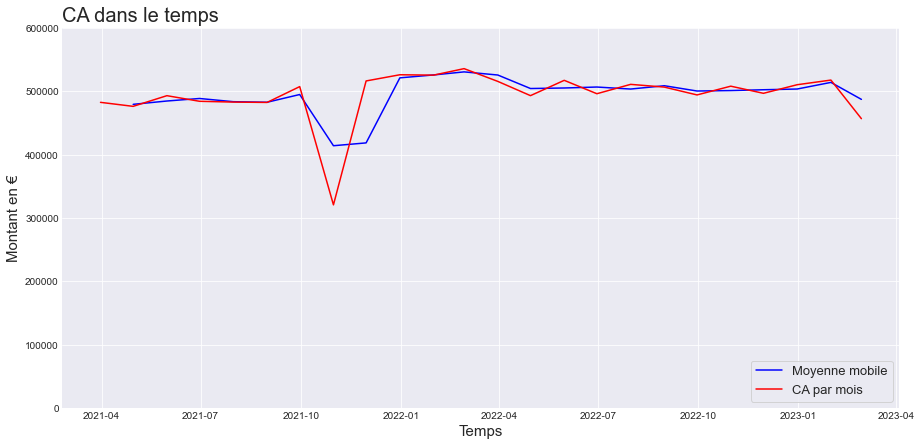

In [44]:
# Calcul de la moyenne mobile 
mye_mob_mois = ca_mois['price'].rolling(2).mean()

# Visualisation
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,7))
plt.plot(mye_mob_mois, color = 'blue', label = 'Moyenne mobile')
plt.plot(ca_mois['price'], color = 'red', label = 'CA par mois')
plt.title('CA dans le temps', fontsize = 20, loc = 'left')
plt.xlabel('Temps', fontsize = 15)
plt.ylabel('Montant en €', fontsize = 15)
plt.ylim(0,600000)
plt.legend(loc = 'lower right', frameon=True, prop = {'size':13})
plt.show()

In [45]:
print('Le chiffre d\'affaire sur la période est de : ','{:.2f}'.format(ventes['price'].sum()),'€')
print('Soit un chiffre d\'affaire mensuel moyen de : ', '{:.2f}'.format(ca_mois['price'].mean()),'€')

Le chiffre d'affaire sur la période est de :  11853728.68 €
Soit un chiffre d'affaire mensuel moyen de :  493905.36 €


Il y a :
>- Une nette et importante chute du chiffre d'affaire en **octobre 2021** (autour de 320K €)
>- Un ensemble relativement stable

<span style='color:teal'>**Nombre de ventes**</span>

In [46]:
# Somme des ventes par mois
nbe_ventes = ventes.resample('M', on = 'date').count()
nbe_ventes.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id
date,,,,,,,,
2021-03-31,28601,28601,28601,28601,28601,28601,28601,28601
2021-04-30,28443,28443,28443,28443,28443,28443,28443,28443
2021-05-31,28285,28285,28285,28285,28285,28285,28285,28285
2021-06-30,26850,26850,26850,26850,26850,26850,26850,26850
2021-07-31,24738,24738,24738,24738,24738,24738,24738,24738


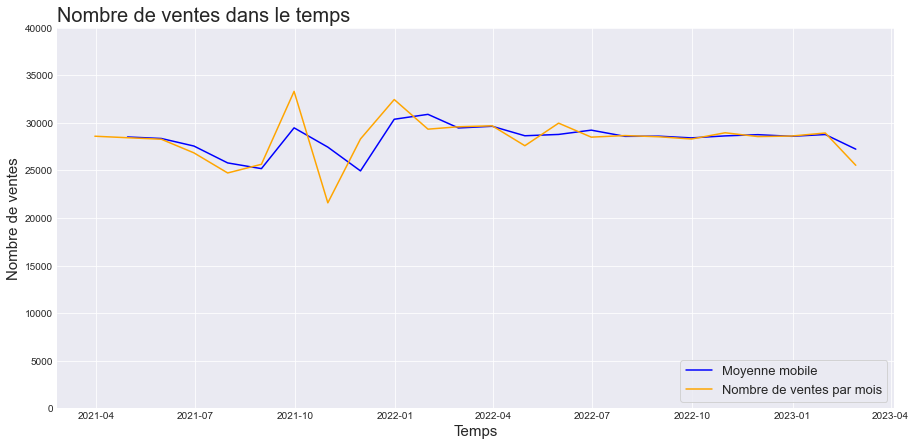

In [47]:
# Calcul de la moyenne mobile
mye_mob_ventes = nbe_ventes['price'].rolling(2).mean()

# Visualisation
plt.figure(figsize=(15,7))
plt.plot(mye_mob_ventes, color = 'blue', label = 'Moyenne mobile')
plt.plot(nbe_ventes['price'], color = 'orange', label = 'Nombre de ventes par mois')
plt.title('Nombre de ventes dans le temps', fontsize = 20, loc = 'left')
plt.xlabel('Temps', fontsize = 15)
plt.ylabel('Nombre de ventes', fontsize = 15)
plt.ylim(0,40000)
plt.legend(loc = 'lower right', frameon = True, prop = {'size':13})
plt.show()

In [48]:
print('Le nombre moyen de ventes mensuelles est de : ', '{:.0f}'.format(nbe_ventes['price'].mean()))

Le nombre moyen de ventes mensuelles est de :  28296


Il y a :
>- Une très forte baisse du nombre de ventes en **octobre** (autour de 21K)
>- Une tendance globale autour de 28k

### Chiffre d'affaire par catégories

Pour avoir ce résultat, je regard combien y a-t-il de catégories.

In [49]:
# Recherche des différentes valeurs existantes
ventes['categ'].unique()

array([0, 1, 2], dtype=int64)

Il y trois catégories différentes nommées respectivement : 0, 1 et 2.

Pour plus de simplicité, j'ajoute une colonne "date_mois" avec uniquement *AAAA-MM*.

In [50]:
ventes['date_mois'] = pd.to_datetime(ventes['date'].dt.strftime('%Y-%m'))
ventes.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id,date_mois
0,0_1421,19.99,0,c_5152,f,1986-01-01,2021-04-17,s_21727,2021-04-01
1,0_1421,19.99,0,c_2167,f,1960-01-01,2021-11-24,s_124134,2021-11-01
2,0_1421,19.99,0,c_2167,f,1960-01-01,2022-08-24,s_257560,2022-08-01
3,0_1421,19.99,0,c_3060,m,1971-01-01,2021-04-06,s_16742,2021-04-01
4,0_1421,19.99,0,c_3060,m,1971-01-01,2022-03-06,s_175117,2022-03-01


In [51]:
ca_categ = ventes.pivot_table(index = ['date_mois'], columns = 'categ', values = 'price', aggfunc = sum).reset_index()
ca_categ.head()

categ,date_mois,0,1,2
0,2021-03-01,193629.17,186974.17,101837.27
1,2021-04-01,205222.46,156138.35,114748.49
2,2021-05-01,196186.72,165893.40,130863.35
3,2021-06-01,167943.15,189162.04,126983.37
4,2021-07-01,144750.79,188523.27,149561.34


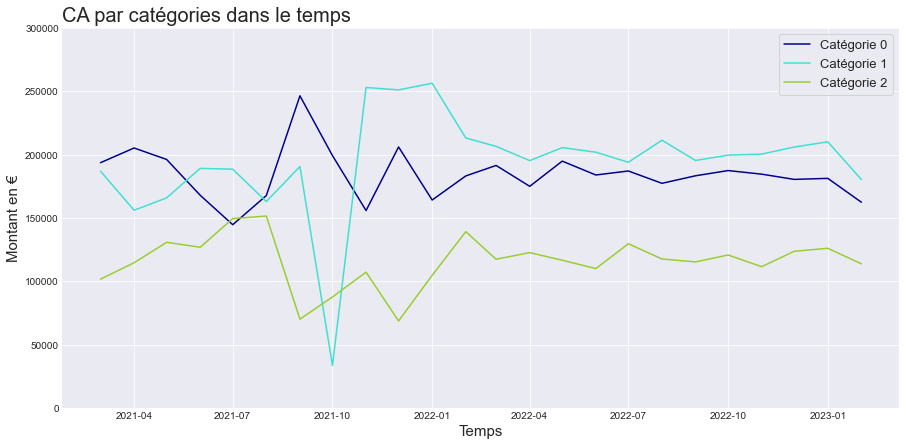

In [52]:
# Visualisation 
x = ca_categ['date_mois']
y0 = ca_categ[0]
y1 = ca_categ[1]
y2 = ca_categ[2]
plt.figure(figsize = (15,7))
plt.plot(x, y0, label = 'Catégorie 0', color = 'darkblue')
plt.plot(x, y1, label = 'Catégorie 1', color = 'turquoise')
plt.plot(x, y2, label = 'Catégorie 2', color = 'yellowgreen')
plt.ylim(0,300000)
plt.xlabel('Temps', fontsize = 15)
plt.ylabel('Montant en €', fontsize = 15)
plt.title('CA par catégories dans le temps', loc = 'left', fontsize = 20, fontweight = 0)
plt.legend(frameon=True, prop={'size':13})
plt.show()

Pour la catégorie 0 :
>- Il y a un pic en **septembre 2021**.
>- Sur le reste du temps le chiffre est relativement stable.

Pour la catégorie 1 :
>- La courbe a un comportement similaire à la courbe du chiffre d'affaire total dans le temps. 
>- On remarque une baisse importante du chiffre d'affaire au mois d'**octobre**.

Pour la catégorie 2 :
>- Il y a une hausse du chiffre d'affaire jusqu'en **juillet 2021**.
>- Une baisse à partir d'**août 2021 puis une remontée en février**.

<span style='color:teal'>**Répartition des ventes et du CA par catégorie**</span>

In [53]:
# Sélection des colonnes utiles
nbe_ventes_categ = ventes.pivot_table(index = 'date_mois', columns = 'categ', values = 'price', aggfunc=len)
nbe_ventes_categ.head()

categ,0,1,2
date_mois,,,
2021-03-01,18131.0,9134.0,1336.0
2021-04-01,19342.0,7579.0,1522.0
2021-05-01,18501.0,8107.0,1677.0
2021-06-01,15898.0,9264.0,1688.0
2021-07-01,13578.0,9169.0,1991.0


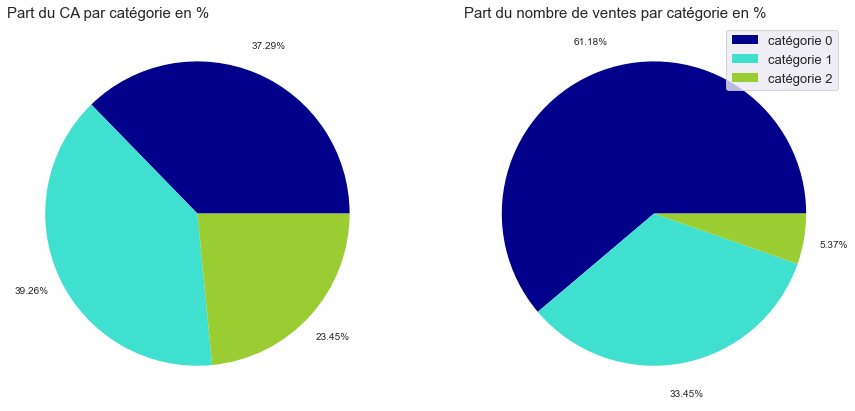

In [54]:
# Visualisation avec un piechart
plt.figure(figsize = (15,7))
plt.subplot(121)
x = [ca_categ[0].sum(), ca_categ[1].sum(), ca_categ[2].sum()]
plt.pie(x, colors = ['darkblue', 'turquoise', 'yellowgreen'], autopct = '%.2f%%', pctdistance = 1.2)
plt.title('Part du CA par catégorie en %', fontsize = 15, loc = 'left')

plt.subplot(122)
x = [nbe_ventes_categ[0].sum(), nbe_ventes_categ[1].sum(), nbe_ventes_categ[2].sum()]
plt.pie(x, colors = ['darkblue', 'turquoise', 'yellowgreen'], autopct = '%.2f%%', pctdistance = 1.2)
plt.title('Part du nombre de ventes par catégorie en %', fontsize = 15, loc = 'left')
plt.legend(labels = ['catégorie 0', 'catégorie 1', 'catégorie 2'], loc = 'best', frameon=True, prop = {'size':13})
plt.show()

Les produits de la catégorie 2 représentent seulement 5% des ventes. Pourtant, ils génèrent un peu moins de 25% de chiffre d'affaire.

Autre point, les produits de la catégorie 0 représentent 60% des ventes pour juste 37% du chiffre d'affaire.

>**Les catégories répertorient des produits plus ou moins chers et plus ou moins prisés.**

<span style='color:teal'>**Prix unitaire par catégorie**</span>

On regarde le prix unitaire des produits de chaque catégorie pour affiner la description des catégories.

In [55]:
# Catégorie 0
ventes.loc[ventes['categ'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
price,415459.0,10.638188,4.933527,0.62,6.29,9.99,14.45,40.99
categ,415459.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00


In [56]:
# Catégorie 1
ventes.loc[ventes['categ'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
price,227169.0,20.48573,7.584894,2.0,15.81,19.08,24.98,80.99
categ,227169.0,1.00000,0.000000,1.0,1.00,1.00,1.00,1.00


In [57]:
# Catégorie 2
ventes.loc[ventes['categ'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
price,36483.0,76.207412,39.749015,30.99,53.99,62.83,73.72,300.0
categ,36483.0,2.000000,0.000000,2.00,2.00,2.00,2.00,2.0


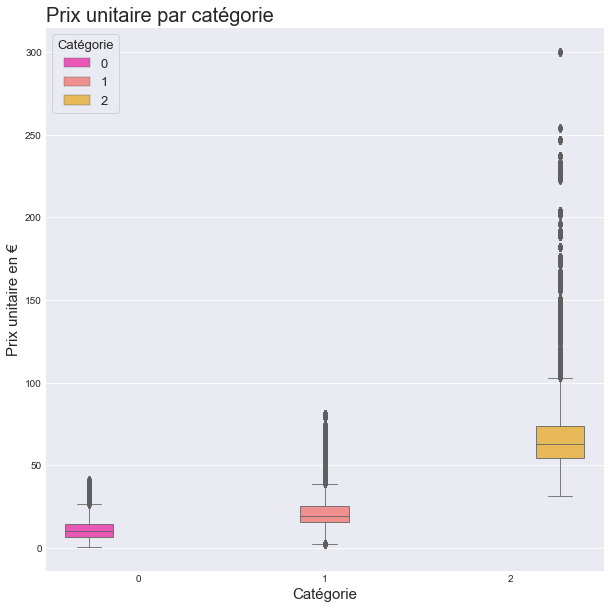

In [58]:
# Visualisation avec des boxplot
plt.figure(figsize = (10,10))
sns.boxplot(x = 'categ', y = 'price', hue = 'categ', linewidth = 0.8, data = ventes, palette = 'spring')
plt.title('Prix unitaire par catégorie', fontsize = 20, loc = 'left')
plt.xlabel('Catégorie', fontsize = 15)
plt.ylabel('Prix unitaire en €', fontsize = 15)
plt.legend(title = 'Catégorie', title_fontsize = 13, loc = 'upper left', frameon=True, prop = {'size':13})
plt.show()

>- Les produits de la **catégorie 0** sont des produits d'un prix moyens de 10€ et n'excédant pas 40€. Donc des livres courants, grands publics.
>- Les produits de la **catégorie 1** sont des produits d'un prix moyen de 20€ et pouvant aller jusqu'à 80€. Là aussi des livres plutôt grand public mais aussi des beaux livres.
>- Les produits de la **catégorie 2** sont des produits d'un prix moyen de 76€ dont les moins chères sont à 30€. Ici, ce sont des livres plus spécifiques voir rares au vue du prix maximum de 300€.

### Chiffre d'affaire par client

In [59]:
# Sélection des colonnes utiles
ca_client = ventes.groupby('client_id').agg({'price':'sum'}).reset_index()
ca_client.head()

,client_id,price
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86


In [60]:
ca_client.describe().T

,count,mean,std,min,25%,50%,75%,max
price,8600.0,1378.340544,5182.542488,6.31,547.63,1027.02,1779.5,324033.35


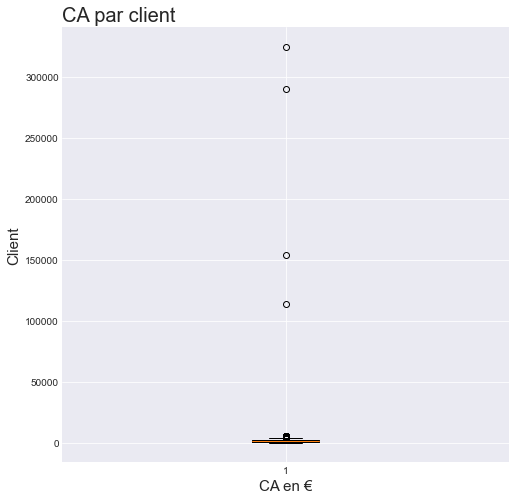

In [61]:
# Visualisation avec un boxplot
plt.figure(figsize = (8,8))
plt.boxplot(ca_client['price'])
plt.title('CA par client', fontsize = 20, loc = 'left')
plt.ylabel('Client', fontsize = 15)
plt.xlabel('CA en €', fontsize = 15)
plt.show()

Cette visualisation montre clairement qu'il y a **4 très gros acheteurs**. Probablement, des grossistes.
Je vais donc travailler avec 2 df, un pour les clients dits "particuliers" nommé **BtoC** et un pour les clients professionnels nommé **BtoB**.

In [62]:
# Recherche de l'identifiant des plus gros clients
ca_client.sort_values(by = 'price', ascending=False).head()

,client_id,price
677,c_1609,324033.35
4388,c_4958,289760.34
6337,c_6714,153598.92
2724,c_3454,113637.93
2513,c_3263,5276.87


>Il faut créer un df BtoB avec les identifiants clients suivants :
>- c_1609
>- c_4958
>- c_6714
>- c_3454

Pour avoir le df BtoC, je supprime les lignes qui concernent les identifiants précédement trouvé.

In [63]:
# Pour ne pas dénaturer le df ventes je crée une copie
ventes_btoc = ventes.copy()

In [64]:
# Création d'une liste avec les identifiants des 4 clients
gros_client = ['c_1609', 'c_4958', 'c_6714', 'c_3454']
# Indexation des achats des clients recherchés
indexNames = ventes_btoc[ventes_btoc['client_id'].isin(gros_client)].index
# Suppression des lignes concernant ces clients
ventes_btoc.drop(indexNames, inplace=True)  
# Export pour présentation
ventes_btoc.to_csv('ventes_btoc.csv')

In [65]:
# Création du df BtoB
ventes_btob = ventes.loc[ventes['client_id'].isin(gros_client)]
ventes_btob.to_csv('ventes_btob.csv')    # Export pour présentation
ventes_btob.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id,date_mois
234,0_1421,19.99,0,c_6714,f,1968-01-01,2022-01-12,s_148474,2022-01-01
235,0_1421,19.99,0,c_6714,f,1968-01-01,2021-09-20,s_92614,2021-09-01
236,0_1421,19.99,0,c_6714,f,1968-01-01,2022-11-10,s_295343,2022-11-01
237,0_1421,19.99,0,c_6714,f,1968-01-01,2021-12-12,s_133316,2021-12-01
238,0_1421,19.99,0,c_6714,f,1968-01-01,2021-04-02,s_14853,2021-04-01


Nous avons donc nos deux dataframe, nous pouvons continuer l'analyse.

### Etude chiffre d'affaire et catégorie par type de clients

<span style='color:teal'>**Clients BtoC**</span>

In [66]:
# Sélection des colonnes utiles
ca_categ_btoc = ventes_btoc.pivot_table(index = 'date_mois', columns = 'categ', values = 'price', aggfunc=sum).reset_index()
ca_categ_btoc.head()

categ,date_mois,0,1,2
0,2021-03-01,180637.95,174569.68,90711.08
1,2021-04-01,191458.18,145272.82,102606.85
2,2021-05-01,182350.51,155309.63,117227.32
3,2021-06-01,156621.73,177840.33,112640.11
4,2021-07-01,135456.27,176647.61,135489.27


In [67]:
# ajout d'une colonne pour avoir le chiffre d'affaire total
ca_categ_btoc['ca_total'] = 0

for i in ca_categ_btoc['date_mois']:
    ca_categ_btoc['ca_total']= ca_categ_btoc[0] + ca_categ_btoc[1] + ca_categ_btoc[2]
ca_categ_btoc.head()

categ,date_mois,0,1,2,ca_total
0,2021-03-01,180637.95,174569.68,90711.08,445918.71
1,2021-04-01,191458.18,145272.82,102606.85,439337.85
2,2021-05-01,182350.51,155309.63,117227.32,454887.46
3,2021-06-01,156621.73,177840.33,112640.11,447102.17
4,2021-07-01,135456.27,176647.61,135489.27,447593.15


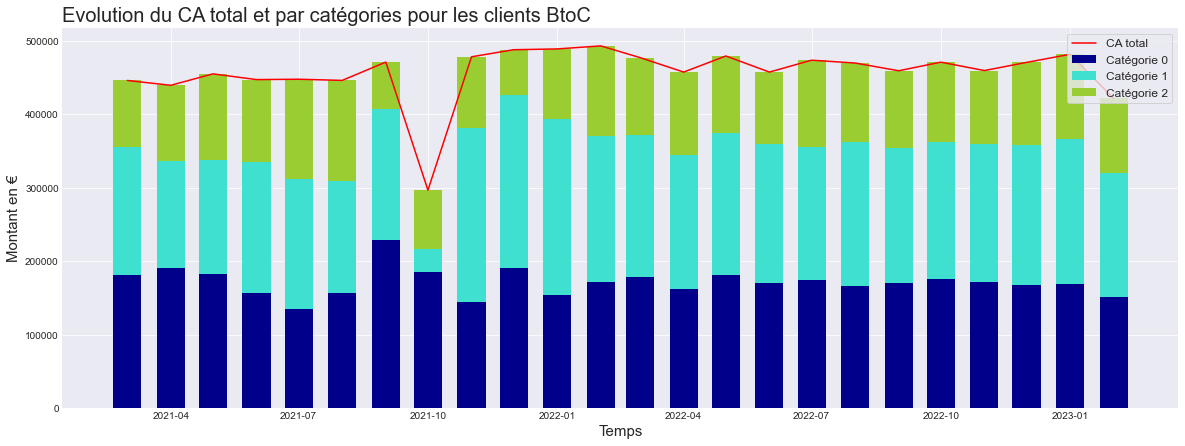

In [68]:
# Visualisation
plt.figure(figsize = (20,7))
x = ca_categ_btoc['date_mois']
yc = ca_categ_btoc['ca_total']
y0 = ca_categ_btoc[0]
y1 = ca_categ_btoc[1]
y2 = ca_categ_btoc[2]
plt.plot(x, yc, label = 'CA total', color = 'red')
plt.bar(x, y0, width = 20, label = 'Catégorie 0', color = 'darkblue')
plt.bar(x, y1, bottom = y0, width = 20, label = 'Catégorie 1', color = 'turquoise')
plt.bar(x, y2, bottom = y0 + y1, width = 20, label = 'Catégorie 2', color = 'yellowgreen')
plt.title('Evolution du CA total et par catégories pour les clients BtoC', fontsize = 20, loc = 'left')
plt.xlabel('Temps', fontsize = 15)
plt.ylabel('Montant en €', fontsize = 15)
plt.legend(loc = 'upper right', frameon=True, prop={'size':12})
plt.show()

In [69]:
print('Chiffre d\'affaire mensuel moyen de : ', '{:.2f}'.format(ca_categ_btoc['ca_total'].mean()),'€')

Chiffre d'affaire mensuel moyen de :  457195.76 €


On remarque :
>- une baisse du CA en **octobre 2021**
>- une baisse du nombre de ventes pour la **catégorie 1** en **octobre 2021**

<span style='color:teal'>**Clients BtoB**</span>

In [70]:
# Sélection des colonnes utiles
ca_categ_btob = ventes_btob.pivot_table(index = 'date_mois', columns = 'categ', values = 'price', aggfunc = sum).reset_index()
ca_categ_btob.head()

categ,date_mois,0,1,2
0,2021-03-01,12991.22,12404.49,11126.19
1,2021-04-01,13764.28,10865.53,12141.64
2,2021-05-01,13836.21,10583.77,13636.03
3,2021-06-01,11321.42,11321.71,14343.26
4,2021-07-01,9294.52,11875.66,14072.07


In [71]:
# Ajout d'une colonne "ca_total"
ca_categ_btob['ca_total'] = 0
for i in ca_categ_btob['date_mois']:
    ca_categ_btob['ca_total'] = ca_categ_btob[0] + ca_categ_btob[1] + ca_categ_btob[2]
ca_categ_btob.head()

categ,date_mois,0,1,2,ca_total
0,2021-03-01,12991.22,12404.49,11126.19,36521.90
1,2021-04-01,13764.28,10865.53,12141.64,36771.45
2,2021-05-01,13836.21,10583.77,13636.03,38056.01
3,2021-06-01,11321.42,11321.71,14343.26,36986.39
4,2021-07-01,9294.52,11875.66,14072.07,35242.25


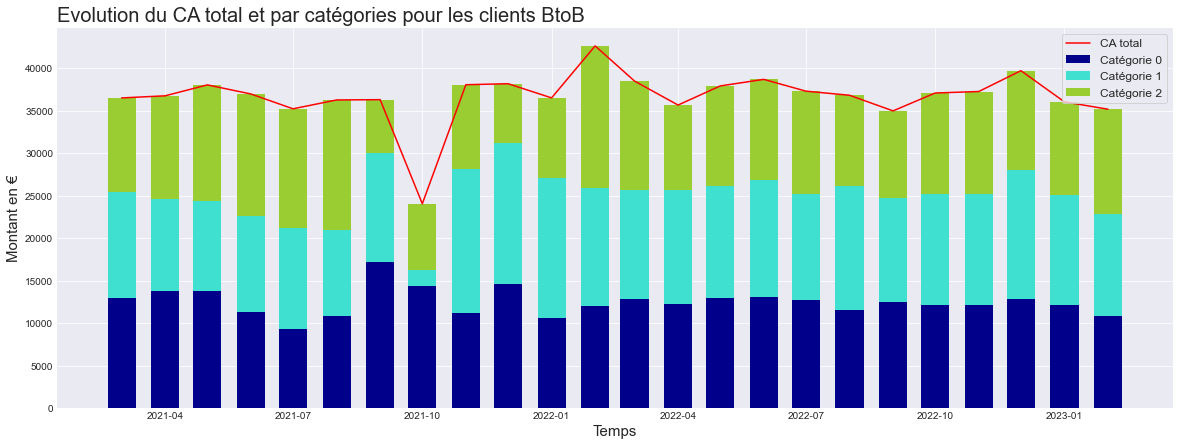

In [72]:
# Visualisation
plt.figure(figsize = (20,7))
x = ca_categ_btob['date_mois']
yc = ca_categ_btob['ca_total']
y0 = ca_categ_btob[0]
y1 = ca_categ_btob[1]
y2 = ca_categ_btob[2]
plt.plot(x, yc, label = 'CA total', color = 'red')
plt.bar(x, y0, width = 20, label = 'Catégorie 0', color = 'darkblue')
plt.bar(x, y1, bottom = y0, width = 20, label = 'Catégorie 1', color = 'turquoise')
plt.bar(x, y2, bottom = y0 + y1, width = 20, label = 'Catégorie 2', color = 'yellowgreen')
plt.title('Evolution du CA total et par catégories pour les clients BtoB', fontsize = 20, loc = 'left')
plt.xlabel('Temps', fontsize = 15)
plt.ylabel('Montant en €', fontsize = 15)
plt.legend(loc='upper right', frameon=True, prop={'size':12})
plt.show()

In [73]:
print('Chiffre d\'affaire mensuel moyen de : ', '{:.2f}'.format(ca_categ_btob['ca_total'].mean()),'€')

Chiffre d'affaire mensuel moyen de :  36709.61 €


On observe :
>- Une baisse du CA en **octobre 2021**
>- Une baisse des ventes pour la **catégorie 1** en **octobre 2021**

<span style='color:teal'>**Répartition du chiffre d'affaire entre BtoB et BtoC**</span>

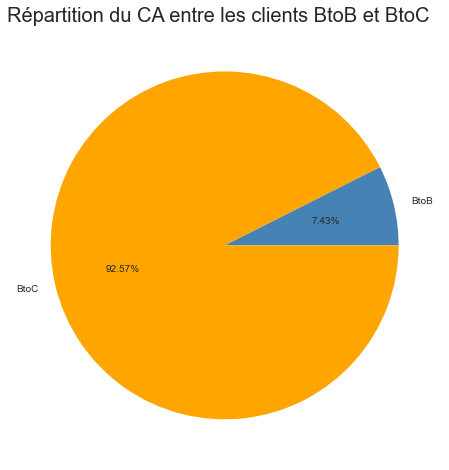

In [74]:
x = ventes_btob['price'].sum()*100/ventes['price'].sum()
y = ventes_btoc['price'].sum()*100/ventes['price'].sum()
z = [x, y]
plt.figure(figsize=(8,8))
plt.pie(z, labels = ['BtoB', 'BtoC'], colors = ['steelblue', 'orange'], autopct = '%.2f%%')
plt.title('Répartition du CA entre les clients BtoB et BtoC', fontsize=20, loc='left')
plt.show()

In [75]:
print('Le chiffre d\'affaire des clients BtoB est de : ','{:.2f}'.format(ventes_btob['price'].sum()),'€')

Le chiffre d'affaire des clients BtoB est de :  881030.54 €


> La part du CA représentée par la clientèle BtoB n'est pas négligeable.

### Etude du panier moyen

<span style='color:teal'>**Panier moyen des clients BtoC**</span>

In [76]:
# Sélection des colonnes utiles
panier_moyen = ventes_btoc.groupby('client_id').agg({'price':'mean'}).reset_index()
panier_moyen.head()

,client_id,price
0,c_1,14.312308
1,c_10,23.337931
2,c_100,31.856250
3,c_1000,18.095120
4,c_1001,17.773137


In [77]:
# Description
panier_moyen.describe().T

,count,mean,std,min,25%,50%,75%,max
price,8596.0,22.022773,15.005279,4.15,13.360135,15.7937,22.043137,181.99


<span style='color:teal'>**Panier moyen client BtoB**</span>

In [78]:
# Sélection des colonnes utiles
panier_moyen_btob = ventes_btob.groupby('client_id').agg({'price':'mean'}).reset_index()
panier_moyen_btob

,client_id,price
0,c_1609,12.713173
1,c_3454,16.785514
2,c_4958,55.776774
3,c_6714,16.730086


In [79]:
# Description
panier_moyen_btob.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4.0,25.501387,20.273461,12.713173,15.725858,16.7578,26.533329,55.776774


<span style='color:teal'>**Visualisation avec les deux types de clients**</span>

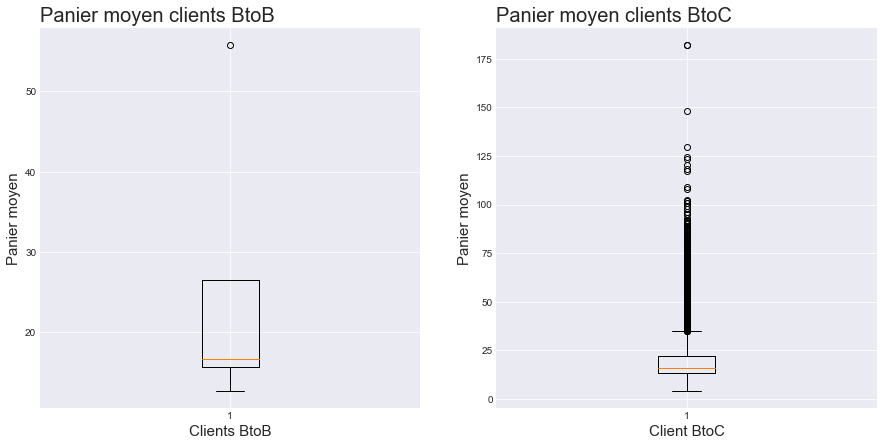

In [80]:
# Visualisation de la dispersion
plt.figure(figsize = (15,7))
xb = panier_moyen_btob['price']
xc = panier_moyen['price']
plt.subplot(121)
plt.boxplot(xb)
plt.title('Panier moyen clients BtoB', fontsize = 20, loc = 'left')
plt.xlabel('Clients BtoB', fontsize = 15)
plt.ylabel('Panier moyen', fontsize = 15)

plt.subplot(122)
plt.boxplot(xc)
plt.title('Panier moyen clients BtoC', fontsize = 20, loc = 'left')
plt.xlabel('Client BtoC', fontsize = 15)
plt.ylabel('Panier moyen', fontsize = 15)
plt.show()

Pour les clients **BtoB** :
>- Ici, on observe que les clients pro ont un panier moyen de 25€ mais que la moitié d'entre eux achète pour moins de 16€. Un seul a un panier de 55€.

Pour les clients **BtoC** :
>- La moyenne du panier est de 22€ avec de nombreux outliers.

Le skewness, pour les clients BtoC, est de :  2.40
Le kurtosis, pour les clients BtoC, est de :  8.16
Le skewness, pour les clients BtoB, est de : 1.95
Le kurtosis, pour les clients BtoB, est de :  3.84


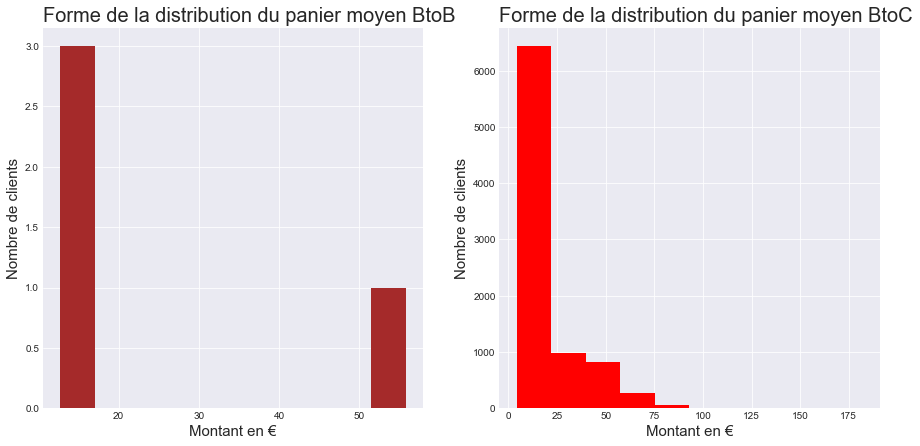

In [81]:
# Calcul des mesures de forme
print('Le skewness, pour les clients BtoC, est de : ','{:.2f}'.format(panier_moyen['price'].skew()))
print('Le kurtosis, pour les clients BtoC, est de : ','{:.2f}'.format(panier_moyen['price'].kurtosis()))
print('Le skewness, pour les clients BtoB, est de :','{:.2f}'.format(panier_moyen_btob['price'].skew()))
print('Le kurtosis, pour les clients BtoB, est de : ','{:.2f}'.format(panier_moyen_btob['price'].kurtosis()))

# Visualisation
plt.figure(figsize = (15,7))
plt.subplot(121)
panier_moyen_btob['price'].hist(color = 'brown')
plt.title('Forme de la distribution du panier moyen BtoB', fontsize = 20, loc = 'left')
plt.xlabel('Montant en €', fontsize = 15)
plt.ylabel('Nombre de clients', fontsize = 15)

plt.subplot(122)
panier_moyen['price'].hist(color = 'red')
plt.title('Forme de la distribution du panier moyen BtoC', fontsize = 20, loc = 'left')
plt.xlabel('Montant en €', fontsize = 15)
plt.ylabel('Nombre de clients', fontsize = 15)
plt.show()

Au vue du peu de clients **BtoB**, il n'y a pas de grand intérêt à continuer les différentes mesures.

Pour les clients **BtoC** :
>Nous avons une distribution qui est étalée à droite avec des montants de paniers moyens concentrés entre 0 et 25€.

<span style='color:teal'>**Courbe de Lorenz et indice de Gini (uniquement BtoC)**</span>

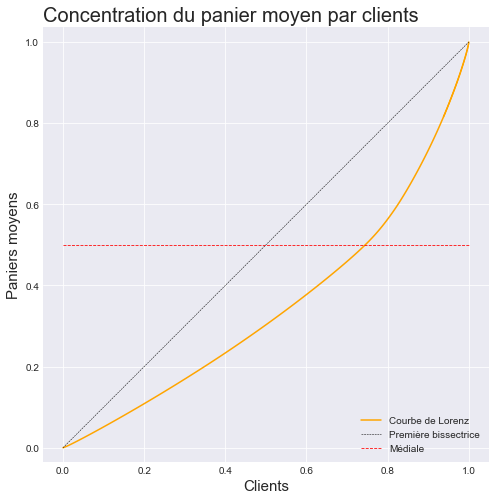

In [82]:
# Courbe de Lorenz
price = panier_moyen['price'].values
n = len(price)
lorenz = np.cumsum(np.sort(price)) / price.sum()
lorenz = np.append([0], lorenz)

plt.figure(figsize=(8,8))
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)

plt.plot(xaxis, lorenz, drawstyle = 'steps-post', label = 'Courbe de Lorenz', color = 'orange')
plt.plot([0,1], [0,1], color = 'black', linestyle = 'dashed', linewidth = 0.5, label = 'Première bissectrice')
plt.plot([0,1], [0.5,0.5], linestyle = '--', linewidth = 0.8, color = 'red', label = 'Médiale')
plt.title('Concentration du panier moyen par clients', fontsize = 20, loc = 'left')
plt.xlabel('Clients', fontsize = 15)
plt.ylabel('Paniers moyens', fontsize = 15)
plt.legend(loc = 'lower right')
plt.show()

In [83]:
# Indice de Gini
AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n # Surface de la courbe de Lorenz
S = 0.5 - AUC # Surface entre la première bissectrice et la courbe de Lorenz
gini = 2*S
print('L'' indice de Gini est de : ','{:.2f}'.format(gini))

L indice de Gini est de :  0.31


> Sur la **courbe de Lorenz**, on observe que **50% de la somme des paniers moyens concernent 75% des clients**.

>L'**indice de Gini** est plus proche de 0, la **répartition** panier moyen client n'est **pas égalitaire**.

## Zoom sur octobre 2021

Pour plus d'information sur le mois d'octobre 2021, j'établis une nouvelle visualisation pour avoir plus de détail.

Je vais donc, sélectionner les ventes qui concernent le mois d'octobre.

In [84]:
# création de la sélection octobre
octobre = pd.date_range("2021-10-01", periods=31, freq='d')
octobre

DatetimeIndex(['2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04',
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-16',
               '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20',
               '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24',
               '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
               '2021-10-29', '2021-10-30', '2021-10-31'],
              dtype='datetime64[ns]', freq='D')

<span style='color:teal'>**Clients BtoC**</span>

In [85]:
# création du dataframe ventes_octobre
ventes_octobre = ventes_btoc.loc[ventes_btoc['date'].isin(octobre)]
ventes_octobre.sort_values('date').head()

,id_prod,price,categ,client_id,sex,birth,date,session_id,date_mois
595392,1_488,12.19,1,c_3181,m,1996-01-01,2021-10-01,s_98238,2021-10-01
389526,0_1353,19.99,0,c_3152,f,1972-01-01,2021-10-01,s_98451,2021-10-01
149632,0_2077,3.99,0,c_2103,f,1973-01-01,2021-10-01,s_98286,2021-10-01
390061,0_1859,4.99,0,c_2747,m,1978-01-01,2021-10-01,s_98217,2021-10-01
392047,1_445,23.99,1,c_5772,m,1975-01-01,2021-10-01,s_98302,2021-10-01


In [86]:
# Pivot du dataframe pour une meilleure lisibilité
ca_octobre = ventes_octobre.pivot_table(index = ['date'], columns = 'categ', values = 'price', aggfunc = sum).reset_index()
ca_octobre.head()

categ,date,0,1,2
0,2021-10-01,6261.11,6530.99,2898.08
1,2021-10-02,6453.51,NaN,1926.99
2,2021-10-03,6231.86,NaN,1827.13
3,2021-10-04,6169.31,NaN,2363.93
4,2021-10-05,6181.62,NaN,2920.56


In [87]:
# Remplacement des valeurs manquantes par 0
ca_octobre.fillna(0, inplace=True)

In [88]:
# Ajout d'une colonne "ca_total"
ca_octobre['ca_total'] = 0
for i in ca_octobre['date']:
    ca_octobre['ca_total'] = ca_octobre[0] + ca_octobre[1] + ca_octobre[2]
ca_octobre.head()

categ,date,0,1,2,ca_total
0,2021-10-01,6261.11,6530.99,2898.08,15690.18
1,2021-10-02,6453.51,0.00,1926.99,8380.50
2,2021-10-03,6231.86,0.00,1827.13,8058.99
3,2021-10-04,6169.31,0.00,2363.93,8533.24
4,2021-10-05,6181.62,0.00,2920.56,9102.18


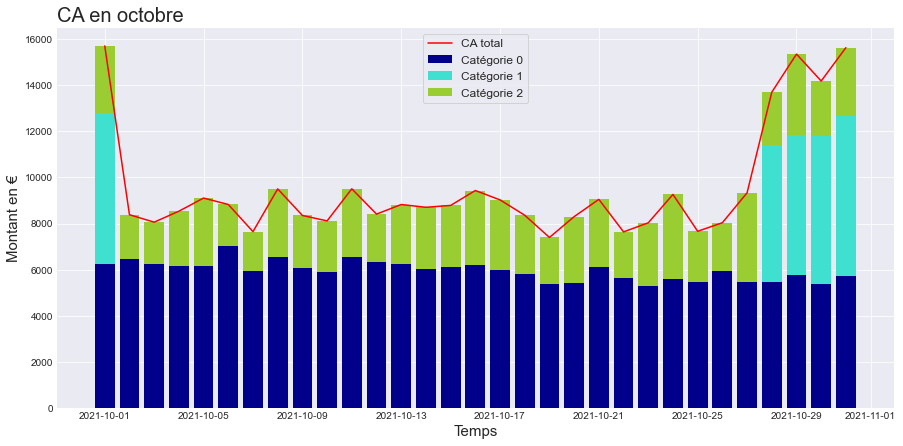

In [89]:
# Visualisation
plt.figure(figsize = (15,7))
x = ca_octobre['date']
yc = ca_octobre['ca_total']
y0 = ca_octobre[0]
y1 = ca_octobre[1]
y2 = ca_octobre[2]
plt.plot(x, yc, label = 'CA total', color = 'red')
plt.bar(x, y0, label = 'Catégorie 0', color = 'darkblue')
plt.bar(x, y1, bottom = y0, label = 'Catégorie 1', color = 'turquoise')
plt.bar(x, y2, bottom = y0 + y1, label = 'Catégorie 2', color = 'yellowgreen')
plt.legend(loc = 'best', frameon=True, prop={'size':12})
plt.xlabel('Temps', fontsize = 15)
plt.ylabel('Montant en €', fontsize = 15)
plt.title('CA en octobre', loc = 'left', fontsize = 20, fontweight = 0)
plt.show()

**Il n'y a aucune ventes pour la catégorie 1 du 2 octobre 2021 au 27 octobre 2021 inclus.**

<span style='color:teal'>**Clients BtoB**</span>

In [90]:
# J'ote les warnings qui pourraient être présents
import warnings
warnings.filterwarnings("ignore")

In [91]:
# Pour plus de simplicité je réduis la colonne "date" au AAAA-MM-JJ
ventes_btob['date'] = pd.to_datetime(ventes_btob['date'].dt.strftime('%Y-%m-%d'))
ventes_btob.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id,date_mois
234,0_1421,19.99,0,c_6714,f,1968-01-01,2022-01-12,s_148474,2022-01-01
235,0_1421,19.99,0,c_6714,f,1968-01-01,2021-09-20,s_92614,2021-09-01
236,0_1421,19.99,0,c_6714,f,1968-01-01,2022-11-10,s_295343,2022-11-01
237,0_1421,19.99,0,c_6714,f,1968-01-01,2021-12-12,s_133316,2021-12-01
238,0_1421,19.99,0,c_6714,f,1968-01-01,2021-04-02,s_14853,2021-04-01


In [92]:
# Sélection des lignes pour octobre
ventes_oct_btob = ventes_btob.loc[ventes_btob['date'].isin(octobre)]
ventes_oct_btob.sort_values('date').head()

,id_prod,price,categ,client_id,sex,birth,date,session_id,date_mois
174435,0_1083,16.99,0,c_1609,m,1980-01-01,2021-10-01,s_98386,2021-10-01
271362,0_1565,7.99,0,c_1609,m,1980-01-01,2021-10-01,s_98431,2021-10-01
365655,0_997,9.99,0,c_1609,m,1980-01-01,2021-10-01,s_98583,2021-10-01
272553,0_1465,3.99,0,c_6714,f,1968-01-01,2021-10-01,s_98534,2021-10-01
633182,1_720,10.86,1,c_6714,f,1968-01-01,2021-10-01,s_98474,2021-10-01


In [93]:
# Etude du CA et categorie
ca_oct_btob = ventes_oct_btob.pivot_table(index = 'date', columns = 'categ', values = 'price', aggfunc=sum).reset_index()
ca_oct_btob.head()

categ,date,0,1,2
0,2021-10-01,689.39,472.8,205.97
1,2021-10-02,687.50,NaN,114.13
2,2021-10-03,554.71,NaN,379.35
3,2021-10-04,364.29,NaN,382.15
4,2021-10-05,176.29,NaN,111.99


In [94]:
# Remplacement des valeurs manquantes par 0
ca_oct_btob.fillna(0, inplace=True)

In [95]:
# Ajout d'une colonne "ca_total"
ca_oct_btob['ca_total'] = 0
for i in ca_oct_btob['date']:
    ca_oct_btob['ca_total'] = ca_oct_btob[0] + ca_oct_btob[1] + ca_oct_btob[2]
ca_oct_btob.head()

categ,date,0,1,2,ca_total
0,2021-10-01,689.39,472.8,205.97,1368.16
1,2021-10-02,687.50,0.0,114.13,801.63
2,2021-10-03,554.71,0.0,379.35,934.06
3,2021-10-04,364.29,0.0,382.15,746.44
4,2021-10-05,176.29,0.0,111.99,288.28


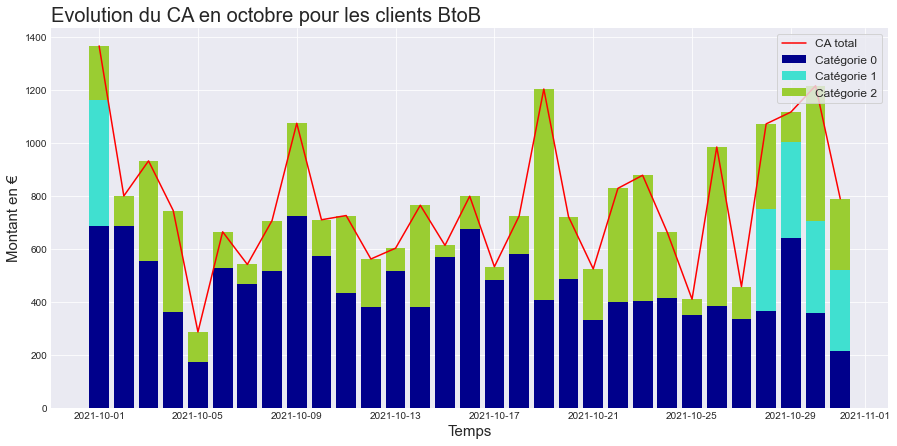

In [96]:
# Visualisation
plt.figure(figsize = (15,7))
x = ca_oct_btob['date']
yb = ca_oct_btob['ca_total']
y0 = ca_oct_btob[0]
y1 = ca_oct_btob[1]
y2 = ca_oct_btob[2]
plt.plot(x, yb, label = 'CA total', color = 'red')
plt.bar(x, y0, width = 0.8, label = 'Catégorie 0', color = 'darkblue')
plt.bar(x, y1, bottom = y0, width = 0.8, label = 'Catégorie 1', color = 'turquoise')
plt.bar(x, y2, bottom = y0 + y1, width = 0.8, label = 'Catégorie 2', color = 'yellowgreen')
plt.legend(loc = 'upper right', frameon=True, prop={'size':12})
plt.title('Evolution du CA en octobre pour les clients BtoB', fontsize = 20, loc = 'left')
plt.xlabel('Temps', fontsize = 15)
plt.ylabel('Montant en €', fontsize = 15)
plt.show()

On voit clairement, qu'il n'y aucune ventes pour la catégorie 1 durant cette période.

>La chute du chiffre d'affaire au mois **d'octobre 2021**, est principalement dû à l'absence de ventes de produits de la **catégorie 1**.

Ce qu'on peut en déduire :
>- Soit il y a eu une rupture de stock sur de nombreux articles dans cette catégorie, d'où un arrêt pour réapprovisionnement.
>- Soit il y a eu un inventaire de cette catégorie. Et comme la période des fêtes de fin d'années est juste après, il y a eu approvisionnement des beaux livres.

## Profil client

### Genre des clients

<span style='color:teal'>**Nombre de clients par genre et par catégorie**</span>

In [97]:
# Sélection des colonnes utiles
genre_nbe_clt = ventes_btoc.groupby(['client_id', 'sex', 'categ']).agg({'price':'count'}).reset_index()
genre_nbe_clt.head()

,client_id,sex,categ,price
0,c_1,m,0,30
1,c_1,m,1,8
2,c_1,m,2,1
3,c_10,m,0,20
4,c_10,m,1,34


In [98]:
prop_genre = genre_nbe_clt.loc[genre_nbe_clt['sex']=='f'].count()*100/genre_nbe_clt['client_id'].count()
print('Il y a ',prop_genre,'% de femmes dans la clientèle.')

Il y a  client_id    51.916324
sex          51.916324
categ        51.916324
price        51.916324
dtype: float64 % de femmes dans la clientèle.


In [99]:
# Comptage des clients par genre pour la catégorie 0
nbe_cat_0 = genre_nbe_clt.loc[genre_nbe_clt['categ'] == 0]

m = 0
f = 0
for i in nbe_cat_0['sex']:
    if i == 'm':
        m += 1
    else :
        f +=1
print('Dans la catégorie 0, il y a ',m, ' hommes et ',f,' femmes.')

Dans la catégorie 0, il y a  3773  hommes et  4119  femmes.


In [100]:
# Comptage des clients par genre pour la catégorie 1
nbe_cat_1 = genre_nbe_clt.loc[genre_nbe_clt['categ'] == 1]

m = 0
f = 0
for i in nbe_cat_1['sex']:
    if i == 'm' :
        m += 1
    else :
        f += 1
print('Dans la catégorie 1, il y a ',m,' hommes et ',f,' femmes.')

Dans la catégorie 1, il y a  4058  hommes et  4391  femmes.


In [101]:
# Comptage des clients par genre pour la catégorie 2
nbe_cat_2 = genre_nbe_clt.loc[genre_nbe_clt['categ'] == 2]

m = 0
f = 0
for i in nbe_cat_2['sex']:
    if i == 'm' : 
        m += 1
    else :
        f += 1
print('Dans la catégorie 2, il y a ',m,' hommes et ',f,' femmes.')     

Dans la catégorie 2, il y a  1754  hommes et  1839  femmes.


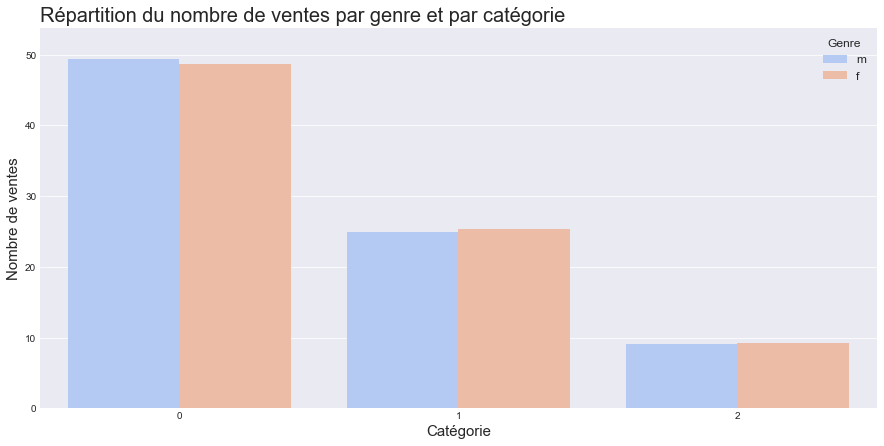

In [102]:
# Visualisation
plt.figure(figsize=(15,7))
sns.barplot(x = 'categ', y = 'price', hue = 'sex', data = genre_nbe_clt, palette = 'coolwarm', errwidth = 0)
plt.legend(prop={'size':12}, title = 'Genre', title_fontsize=12)
plt.title('Répartition du nombre de ventes par genre et par catégorie', fontsize = 20, loc = 'left')
plt.xlabel('Catégorie', fontsize = 15)
plt.ylabel('Nombre de ventes', fontsize = 15)
plt.show()

>Il y a plus de femmes que d'hommes dans chaque catégorie donc potentiellement un nombre d'achats plus important chez les femmes.

<span style='color:teal'>**Genre des clients et chiffre d'affaire**</span>

In [103]:
genres_ca = ventes_btoc.pivot_table(index = 'date_mois', columns = 'sex', values = 'price', aggfunc = sum).reset_index()
genres_ca.head()

sex,date_mois,f,m
0,2021-03-01,229569.34,216349.37
1,2021-04-01,230830.89,208506.96
2,2021-05-01,240181.71,214705.75
3,2021-06-01,230692.89,216409.28
4,2021-07-01,230548.66,217044.49


In [104]:
# Tendance centrale
genres_ca.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,24.0,237753.508750,20623.005890,151473.30,231890.5125,240765.635,248662.5375,257777.6
m,24.0,219442.247083,18107.007893,145255.05,216394.3025,222552.000,228908.7250,238393.0


Le skewness, pour le genre femme, est de :  -3.36
Le kurtosis, pour le genre femme, est de :  14.02
Le skewness, pour le genre homme, est de :  -3.18
Le kurtosis, pour le genre homme, est de :  12.70


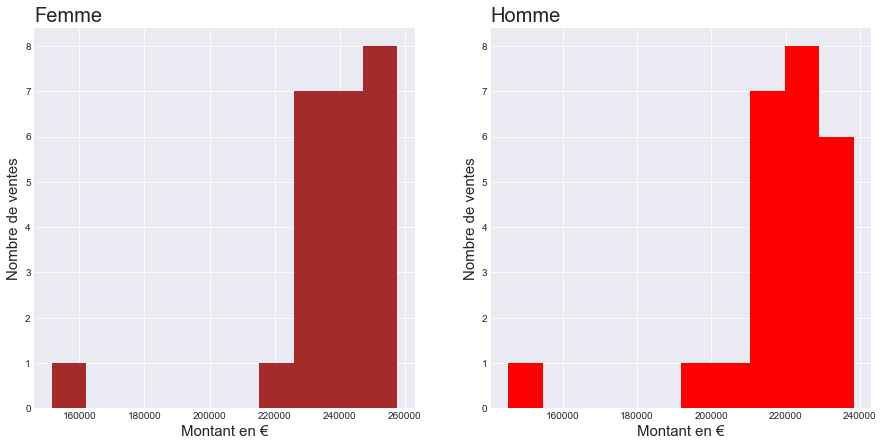

In [105]:
# Mesures de forme
print('Le skewness, pour le genre femme, est de : ','{:.2f}'.format(genres_ca['f'].skew()))
print('Le kurtosis, pour le genre femme, est de : ','{:.2f}'.format(genres_ca['f'].kurtosis()))
print('Le skewness, pour le genre homme, est de : ','{:.2f}'.format(genres_ca['m'].skew()))
print('Le kurtosis, pour le genre homme, est de : ','{:.2f}'.format(genres_ca['m'].kurtosis()))

# Visualisation
plt.figure(figsize = (15,7))
plt.subplot(121)
genres_ca['f'].hist(color = 'brown')
plt.title('Femme', fontsize = 20, loc = 'left')
plt.xlabel('Montant en €', fontsize = 15)
plt.ylabel('Nombre de ventes', fontsize = 15)

plt.subplot(122)
genres_ca['m'].hist(color = 'red')
plt.title('Homme', fontsize = 20, loc = 'left')
plt.xlabel('Montant en €', fontsize = 15)
plt.ylabel('Nombre de ventes', fontsize = 15)
plt.show()

Pour les femmes :
>La **distribution** est **étalée à gauche** et les **ventes sont concentrées entre 250k et 260k€**.

Pour les hommes :
>La **distribution** est **étalée à gauche** et les **ventes sont concentrées entre 220k et 230k€**.

**On a donc un chiffre d'affaire moins important chez les hommes que chez les femmes.**

<span style='color:teal'>**Genre client par catégorie**</span>

In [106]:
# Sélection des colonnes utiles
genres_categ = ventes_btoc.pivot_table(index = 'sex', columns = 'categ', values = 'price', aggfunc = sum)
genres_categ

categ,0,1,2
sex,,,
f,2.132758e+06,2.285170e+06,1288155.25
m,1.986442e+06,2.064263e+06,1215909.21


Pour savoir s'il y a une dépendance entre ces deux variables, je  réalise un tableau de contingence suivi d'un test du Chi-2.

Je réalise le tableau avec les sommes des prix et non le nombre de ventes, comme il y a un effectif et un chiffre d'affaire plus important chez les femmes que chez des hommes. 

In [107]:
# Tableau de contingence
X = 'sex'
Y = 'categ'

cont = ventes_btoc.pivot_table(index = X, columns = Y, values = 'price', aggfunc = sum, margins = True, margins_name = 'Total')
cont

categ,0,1,2,Total
sex,,,,
f,2.132758e+06,2.285170e+06,1.288155e+06,5.706084e+06
m,1.986442e+06,2.064263e+06,1.215909e+06,5.266614e+06
Total,4.119201e+06,4.349433e+06,2.504064e+06,1.097270e+07


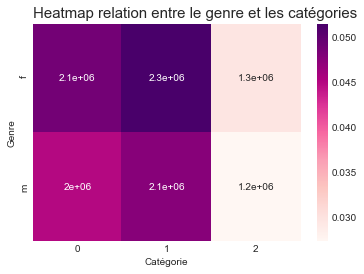

In [108]:
# Tableau de contingence avec coloration
tx = cont.loc[:,['Total']]
ty = cont.loc[['Total'],:]
n = len(ventes_btoc)
indep = tx.dot(ty)/n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1], annot = c.iloc[:-1,:-1], cmap = 'RdPu')
plt.title('Heatmap relation entre le genre et les catégories', fontsize = 15, loc = 'left')
plt.xlabel('Catégorie')
plt.ylabel('Genre')
plt.show()

Ici la **catégorie 1** a une relation plus forte avec le **genre féminin**.

In [109]:
# J'ote les différents totaux pour ne pas altérer le résultat du Chi-2
cont2 = cont.drop(index = 'Total', columns = 'Total')
cont2

categ,0,1,2
sex,,,
f,2.132758e+06,2.285170e+06,1288155.25
m,1.986442e+06,2.064263e+06,1215909.21


On a un niveau de test &alpha;=0.05 :

In [110]:
# Test du Chi 2 
st_chi2, st_p, st_dof, st_exp = sp.chi2_contingency(cont2)
print('Chi-2 : ','{:.2f}'.format(st_chi2))
print('Degré de liberté : ','{:.2f}'.format(st_dof))
print('p-value : ',st_p)
print('Le tableau des fréquences : \n', st_exp)

Chi-2 :  901.68
Degré de liberté :  2.00
p-value :  1.5921483977550052e-196
Le tableau des fréquences : 
 [[2142089.91399742 2261816.60973901 1302177.68626506]
 [1977110.77600212 2087616.38026224 1201886.77373477]]


**p-value < &alpha;, on ne rejette pas l'hypothèse de la dépendance des deux variables.**

### Age des clients

<span style='color:teal'>**Quelle est la répartition de l'âge des clients ?**</span>

Pour faciliter mes calculs, j'ajoute une nouvelle colonne à mon dataframe *ventes*.

In [111]:
# Je vais ajouter une nouvelle colonne 'age'
# Je crée une fonction pour remplir cette colonne à partir de la colonne 'birth'
def birth_to_age(born):
    today = 2022    
    return today - born.year
# Je choisi 2022 car nous avons des résultats sur 3 années donc j'ai pris l'âge moyen sur les 3 années
# J'applique la fonction à ma nouvelle colonne pour la compléter
ventes_btoc['age'] = ventes_btoc['birth'].apply(birth_to_age)
ventes_btoc.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id,date_mois,age
0,0_1421,19.99,0,c_5152,f,1986-01-01,2021-04-17,s_21727,2021-04-01,36
1,0_1421,19.99,0,c_2167,f,1960-01-01,2021-11-24,s_124134,2021-11-01,62
2,0_1421,19.99,0,c_2167,f,1960-01-01,2022-08-24,s_257560,2022-08-01,62
3,0_1421,19.99,0,c_3060,m,1971-01-01,2021-04-06,s_16742,2021-04-01,51
4,0_1421,19.99,0,c_3060,m,1971-01-01,2022-03-06,s_175117,2022-03-01,51


<span style='color:teal'>**Répartition de l'âge des clients**</span>

In [112]:
age_client = ventes_btoc.groupby(['age', 'client_id']).agg({'price':'count'}).reset_index()
age_client

,age,client_id,price
0,18,c_1042,12
1,18,c_1046,41
2,18,c_1065,27
3,18,c_1088,13
4,18,c_109,7
...,...,...,...
8591,92,c_4679,4
8592,92,c_7232,164
8593,93,c_5302,37
8594,93,c_577,115


In [113]:
# Statistiques descriptives
nombre_observations, min_max, moyenne, variance, skewness, kurtosis = sp.describe(age_client['age'])
print('Le nombre d observation est de : ',nombre_observations,'\n','Les âges mini et maxi sont : ', min_max,'\n', 'La moyenne des âges est : ','{:.2f}'.format(moyenne),'\n', 'La variance est de : ', '{:.2f}'.format(variance),'\n', 'Le skewness est de : ','{:.2f}'.format(skewness),'\n', 'Le kurtosis est de : ','{:.2f}'.format(kurtosis))
print('La médiane est de : ', '{:.2f}'.format(age_client['age'].median()))
print('Le mode est : ', age_client['age'].mode())

Le nombre d observation est de :  8596 
 Les âges mini et maxi sont :  (18, 93) 
 La moyenne des âges est :  43.74 
 La variance est de :  285.97 
 Le skewness est de :  0.36 
 Le kurtosis est de :  -0.63
La médiane est de :  43.00
Le mode est :  0    18
dtype: int64


> La **médiane** et la **moyenne** étant relativement proche , on peut penser que la variable suit une **ditribution normale**.

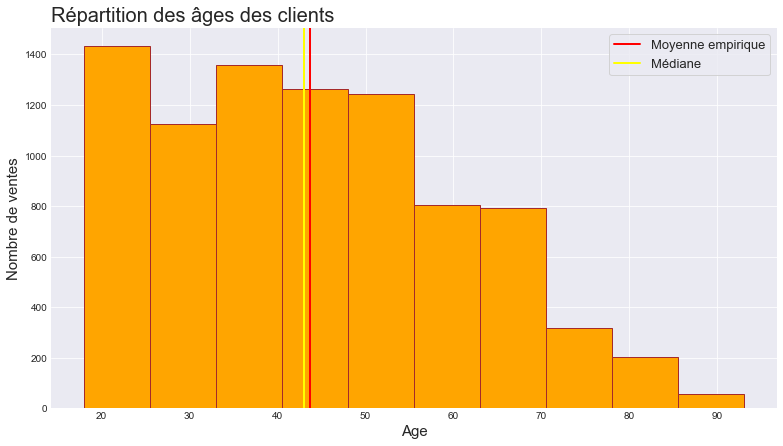

In [114]:
# Visualisation
mean = age_client['age'].mean()
median = age_client['age'].median()
plt.figure(figsize=(13,7))
plt.hist(age_client['age'], color = 'orange', edgecolor='brown')
plt.title('Répartition des âges des clients', fontsize = 20, loc = 'left')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Nombre de ventes', fontsize = 15)
plt.axvline(mean, color = 'r', linewidth=2, label = 'Moyenne empirique')
plt.axvline(median, color = 'yellow', linewidth = 2, label = 'Médiane')
plt.legend(prop = {'size':13}, frameon = True)
plt.show()    

Je réalise un test de Shapiro avec un niveau de test &alpha;=0.05

Notre hypothèse nulle est que notre variable suit une loi normale.

In [115]:
# Test de Shapiro
sp.shapiro(age_client['age'])

ShapiroResult(statistic=0.9697216749191284, pvalue=4.5677537496241046e-39)

> **La p-valeur est inférieure à &alpha;, je ne peut donc pas affirmer que la variable "age" suit une loi normale.**

<span style='color:teal'>**Age des clients et montant total des achats**</span>

In [116]:
# Age par rapport au montant acheté
age_montant = ventes_btoc.groupby('age').agg({'price':'sum'}).reset_index()
age_montant.head()

,age,price
0,18,609013.69
1,19,178195.78
2,20,184177.35
3,21,178497.70
4,22,165007.98


In [117]:
age_montant.describe().T

,count,mean,std,min,25%,50%,75%,max
age,76.0,55.500000,22.083176,18.00,36.75,55.500,74.2500,93.00
price,76.0,144377.607105,112786.914301,2815.45,39057.17,143517.045,224678.8625,609013.69


Je teste la normalité de la variable "price" avec un niveau de test &alpha; de 5%.

In [118]:
# Test de Shapiro
sp.shapiro(age_montant['price'])

ShapiroResult(statistic=0.9116776585578918, pvalue=6.0167825722601265e-05)

> **La p-value est inférieure à &alpha; donc je ne peut pas affirmer que la variable "price" suit une loi normale.**

Je teste l'égalité des variances avec un niveau de test &alpha; de 5%

In [119]:
# Test de Bartlett
sp.bartlett(age_montant['age'], age_montant['price'])

BartlettResult(statistic=1169.0005239154113, pvalue=3.3298414206339906e-256)

> **La p-value est inférieure à &alpha; on ne rejette pas l'égalité des variances.**

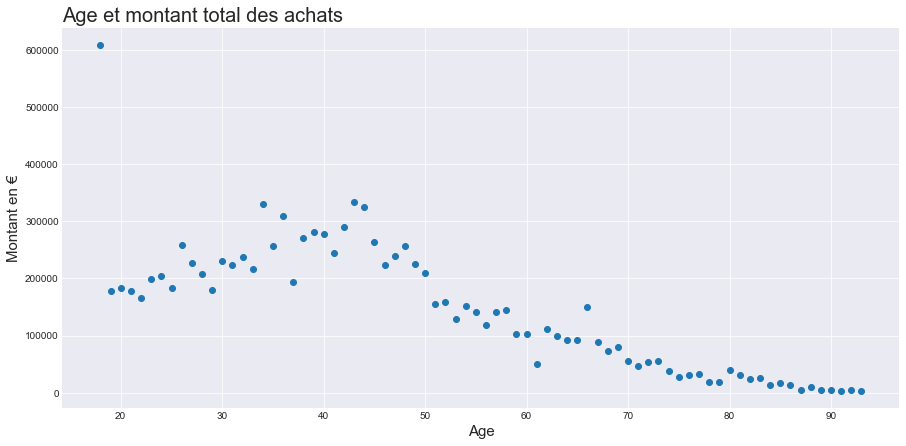

In [120]:
plt.figure(figsize=(15,7))
plt.scatter(age_montant['age'], age_montant['price'])
plt.title('Age et montant total des achats', fontsize = 20, loc = 'left')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Montant en €', fontsize = 15)
plt.show()

Recherche de corrélation entre les variables "age" et "price".

In [121]:
# Calcul du coefficient de corrélation de Pearson
coeff_pearson = sp.pearsonr(age_montant['age'], age_montant['price'])[0]
r_squarred = (sp.pearsonr(age_montant['age'], age_montant['price'])[0])**2
print('Le coefficient de Pearson est de : ',coeff_pearson)
print('r-squarred est de : ', r_squarred)

Le coefficient de Pearson est de :  -0.8306553438502405
r-squarred est de :  0.6899883002669613


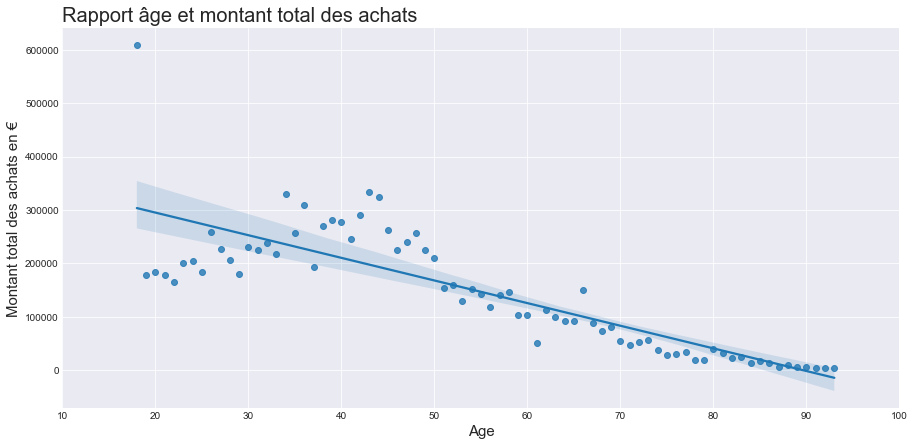

In [122]:
# Réalisation du graphique de régression linéaire
plt.figure(figsize = (15,7))
sns.regplot(x = 'age', y = 'price', data = age_montant)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Montant total des achats en €', fontsize = 15)
plt.title('Rapport âge et montant total des achats', loc = 'left', fontsize = 20, fontweight = 0)
plt.xlim(10,100)
plt.show()

>Le **coefficient de Pearson**, le **R²** et la représentation **graphique de régression linéaire** entre les **variables "age" et "price"**, nous montre **une corrélation** entre les deux.

Tous les âges sont représentés **à partir de 18 ans**. 
> Il y a un point isolé pour l'âge de 18 ans.

Le chiffre d'affaire pour les **clients agés de 18 ans** est supérieur à 600K €. Il peut y avoir plusieurs raisons à cela :
>- L'achat peut être interdit à tout client mineur.
>- Lors de la création d'un compte le client ne souhaite pas noter sa véritable date de naissance.

<span style='color:teal'>**Age par rapport au panier moyen**</span>

Pour avoir le panier moyen, j'utilise la colonne *session_id*.

In [123]:
# Sélection des colonnes utiles
age_panier_moyen = ventes_btoc.groupby(['age', 'session_id']).agg({'price':'sum'}).reset_index()
age_panier_moyen.head()

,age,session_id,price
0,18,s_100056,68.99
1,18,s_100057,67.57
2,18,s_100084,12.99
3,18,s_100087,15.99
4,18,s_100148,67.57


In [124]:
# Je regroupe les données par âge
age_panier_moyen = age_panier_moyen.groupby('age').agg({'price':'mean'}).reset_index()

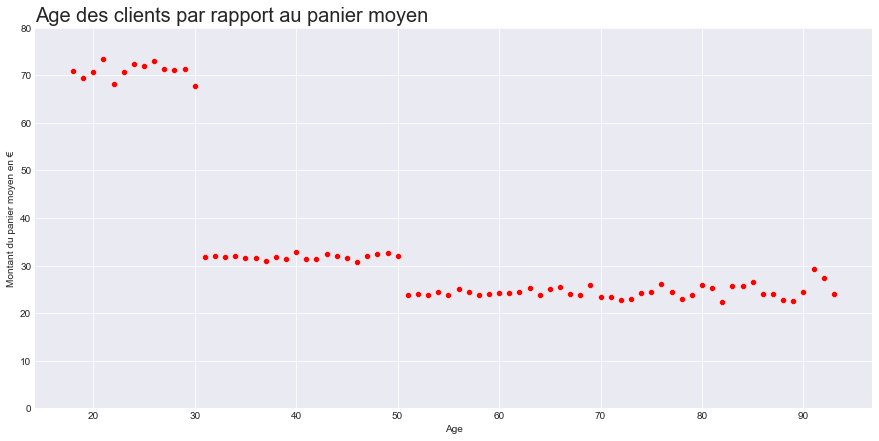

In [125]:
# Visualisation en nuage de points
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'age', y = 'price', color = 'red', data = age_panier_moyen)
plt.xlabel('Age')
plt.ylabel('Montant du panier moyen en €')
plt.title('Age des clients par rapport au panier moyen', loc = 'left', fontsize = 20, fontweight = 0)
plt.ylim(0,80)
plt.show()

On observe plusieurs choses :
>- Entre **18 et 30 ans**, le panier moyen est autour de **70€**
>- Entre **31 et 50 ans**, le panier moyen est autour de **30€**
>- **Au-delà de 50 ans**, le panier moyen est autour de **25€**

Je réalise un test ANOVA pour savoir s'il y a dépendance ou non des variables "age" et "price".

**Le niveau de test &alpha; est de 5% :**

In [126]:
# Test ANOVA
fit = smf.ols('price ~ age', data = age_panier_moyen).fit()
table = sm.stats.anova_lm(fit)
print(table)

            df        sum_sq       mean_sq          F        PR(>F)
age        1.0  12136.520113  12136.520113  92.654909  1.104543e-14
Residual  74.0   9692.983367    130.986262        NaN           NaN


>**La p-valeur est inférieure à &alpha;, il y a donc dépendance entre le panier moyen et l'âge.**

Vue les résultats obtenus avec ce dernier graphique, je vais désormais travailler la variable 'âge' en variable qualitative. Je choisis donc les  quatres catégories suivantes :
>- 0-18 ans
>- 18-30 ans
>- 31-50 ans
>- 51 ans et plus

In [127]:
# Ajout d'une nouvelle colonne 'age_range'
ventes_btoc['age_range'] = pd.cut(x = ventes_btoc['age'], bins = [18,30,50,100])
ventes_btoc.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id,date_mois,age,age_range
0,0_1421,19.99,0,c_5152,f,1986-01-01,2021-04-17,s_21727,2021-04-01,36,"(30, 50]"
1,0_1421,19.99,0,c_2167,f,1960-01-01,2021-11-24,s_124134,2021-11-01,62,"(50, 100]"
2,0_1421,19.99,0,c_2167,f,1960-01-01,2022-08-24,s_257560,2022-08-01,62,"(50, 100]"
3,0_1421,19.99,0,c_3060,m,1971-01-01,2021-04-06,s_16742,2021-04-01,51,"(50, 100]"
4,0_1421,19.99,0,c_3060,m,1971-01-01,2022-03-06,s_175117,2022-03-01,51,"(50, 100]"


<span style='color:teal'>**Age et fréquence d'achat**</span>

In [128]:
effectifs = ventes_btoc['age_range'].value_counts()
modalites = effectifs.index
# Création du tableau à partir des modalites
age_frequence = pd.DataFrame(modalites, columns = ['age_range'])
# Ajout de la colonne des effectifs
age_frequence['n'] = effectifs.values
# Ajout de la colonne de la fréquence calculée
age_frequence['frequence'] = age_frequence['n'] / len(ventes_btoc)
age_frequence.head()

,age_range,n,frequence
0,"(30, 50]",393531,0.622206
1,"(50, 100]",164289,0.259755
2,"(18, 30]",59508,0.094087


In [129]:
# Ajout de la colonne 'F' (fréquence cumulée)
age_frequence = age_frequence.sort_values('age_range')
age_frequence['Frequence_cum'] = age_frequence['frequence'].cumsum()
age_frequence.head()

,age_range,n,frequence,Frequence_cum
2,"(18, 30]",59508,0.094087,0.094087
0,"(30, 50]",393531,0.622206,0.716293
1,"(50, 100]",164289,0.259755,0.976048


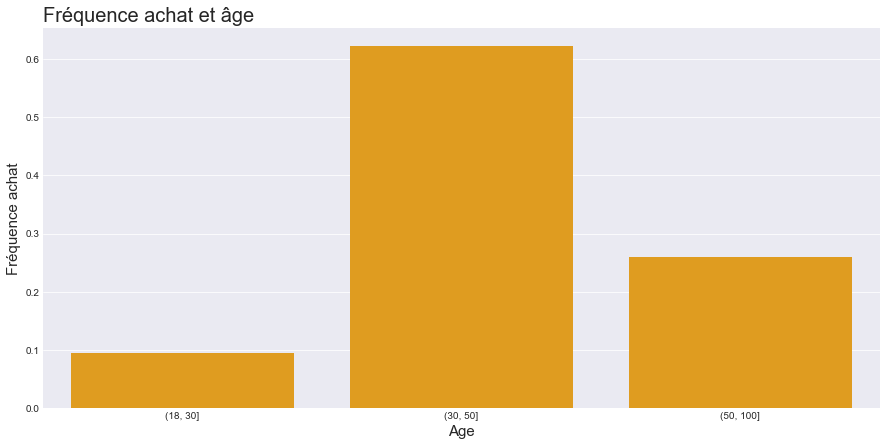

In [130]:
# Visualisation 
plt.figure(figsize = (15,7))
sns.barplot(x = 'age_range', y = 'frequence', color = 'orange', data = age_frequence)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Fréquence achat', fontsize = 15)
plt.title('Fréquence achat et âge', loc = 'left', fontsize = 20, fontweight = 0)
plt.show()

>La tranche d'âge **30-50 ans** est celle qui achète le plus souvent.

<span style='color:teal'>**Age des clients et catégorie de produits achetés**</span>

In [131]:
# Sélection des colonnes utiles
age_cat = ventes_btoc.groupby(['age_range','categ']).agg({'price':'count'}).reset_index()

In [132]:
sp.describe(age_cat['price'])

DescribeResult(nobs=9, minmax=(1475, 299245), mean=68592.0, variance=8815180299.75, skewness=1.8157952080235544, kurtosis=2.228934340134204)

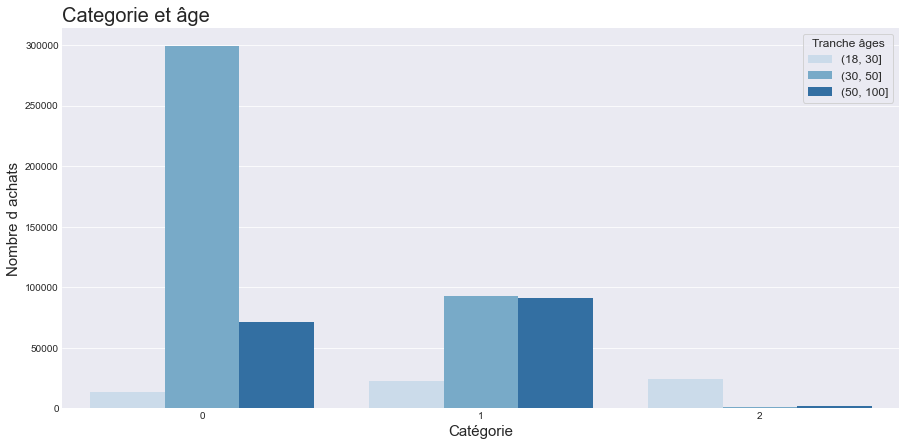

In [133]:
# Visualisation 
plt.figure(figsize = (15,7))
sns.barplot(x = 'categ', y = 'price', hue = 'age_range', data = age_cat, palette = 'Blues')
plt.title('Categorie et âge', fontsize = 20, loc = 'left')
plt.xlabel('Catégorie', fontsize = 15)
plt.ylabel('Nombre d'' achats', fontsize = 15)
plt.legend(title = 'Tranche âges', title_fontsize = 12, frameon=True, prop={'size':12})
plt.show()

In [134]:
# Sélection de la tranche d'âge 18-30ans (T1)
T1 = age_cat.iloc[0:3]
# Sélection de la tranche d'âge 31-50 ans (T2)
T2 = age_cat.iloc[3:6]
# Sélection de la tranche d'âge 50ans et plus (T3)
T3 = age_cat.iloc[6:]

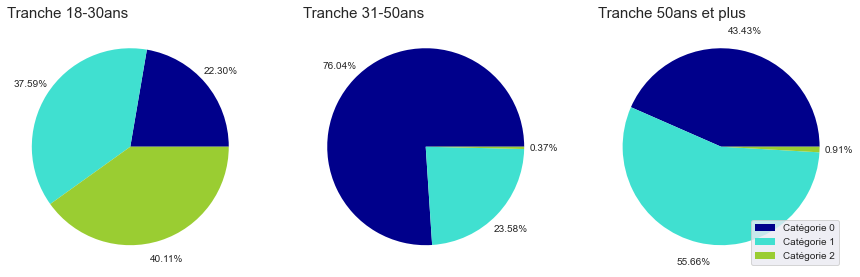

In [135]:
# Visualisation
plt.figure(figsize = (15,7))
# Pie 18-30ans
plt.subplot(131)
x30 = T1['price']
plt.pie(x30, autopct = '%.2f%%', pctdistance = 1.2, colors = ['darkblue', 'turquoise', 'yellowgreen'])
plt.title('Tranche 18-30ans', fontsize = 15, loc = 'left')
#Pie 31-50ans
plt.subplot(132)
x50 = T2['price']
plt.pie(x50, autopct = '%.2f%%', pctdistance = 1.2, colors = ['darkblue', 'turquoise', 'yellowgreen'])
plt.title('Tranche 31-50ans', fontsize = 15, loc = 'left')
#Pie 50ans et plus
plt.subplot(133)
x100 = T3['price']
plt.pie(x100, autopct = '%.2f%%', pctdistance = 1.2, colors = ['darkblue', 'turquoise', 'yellowgreen'])
plt.title('Tranche 50ans et plus', fontsize = 15, loc = 'left')
plt.legend(frameon=True, labels = ['Catégorie 0', 'Catégorie 1', 'Catégorie 2'], loc = 'lower right')
plt.show()

On observe :
>- La **catégorie 2** est principalement achetée par la tranche d'âge **18-30ans**
>- 3/4 des **31-50ans** achète un produit de la **catégorie 0**
>- Plus de la moitié des **50ans et plus** achètent un produit de la **catégorie 1**

<span style='color:teal'>**Analyse des variables 'age_range' et 'categ'**</span>

Pour rappel : ces deux variables sont qualitatives.

In [136]:
# Représentation du tableau de contingence
X = 'age_range'
Y = 'categ'

cont3 = ventes_btoc[[X,Y]].pivot_table(index = X, columns = Y, aggfunc = len, margins = True, margins_name = 'Total')
cont3

categ,0,1,2,Total
age_range,,,,
"(18, 30]",13273,22368,23867,59508
"(30, 50]",299245,92811,1475,393531
"(50, 100]",71345,91450,1494,164289
Total,383863,206629,26836,617328


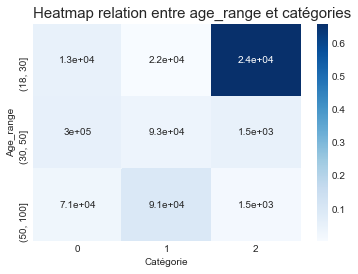

In [137]:
# Tableau de contingence avec coloration
tx = cont3.loc[:,['Total']]
ty = cont3.loc[['Total'],:]
n = len(ventes_btoc)
indep = tx.dot(ty)/n

c = cont3.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1], annot = c.iloc[:-1,:-1], cmap = 'Blues')
plt.title('Heatmap relation entre age_range et catégories', fontsize = 15, loc = 'left')
plt.xlabel('Catégorie')
plt.ylabel('Age_range')
plt.show()

Ici, on voit que la relation entre la **catégorie 2** et la tranche d'âge **18-30ans** est la plus forte.

**Niveau de test &alpha; de 5%**

In [138]:
# J'ote les totaux pour faciliter le test du chi-2
cont4 = cont3.drop(index = 'Total', columns = 'Total')
# Test du chi-2
st_chi2, st_p, st_dof, st_exp = sp.chi2_contingency(cont4)
print('Chi-2 : ','{:.2f}'.format(st_chi2))
print('Le degré de liberté est de : ', '{:.2f}'.format(st_dof))
print('p-value : ',st_p)
print('Le tableau de fréquence :\n', st_exp)

Chi-2 :  266441.71
Le degré de liberté est de :  4.00
p-value :  0.0
Le tableau de fréquence :
 [[ 37002.88890833  19918.22585724   2586.88523443]
 [244702.96220648 131720.76594452  17107.271849  ]
 [102157.1488852   54990.00819823   7141.84291657]]


>**La p-value < &alpha;, donc on ne rejette pas l'hypothèse de dépendance des deux variables.**

## Les références produits

### Top / Flop des références

<span style='color:teal'>**Le top des références**</span>

In [139]:
# Sélection des colonnes utiles
references = ventes.groupby(['id_prod', 'categ']).agg({'price':'count'}).reset_index()

In [140]:
# Classement top 10 sur l'ensemble des ventes
references.sort_values('price', ascending=False).head(10)

,id_prod,categ,price
2591,1_369,1,2252
2644,1_417,1,2189
2641,1_414,1,2180
2733,1_498,1,2128
2653,1_425,1,2096
2629,1_403,1,1960
2639,1_412,1,1951
2640,1_413,1,1945
2632,1_406,1,1939
2633,1_407,1,1935


>Les références **les plus vendus** appartiennent à la **catégorie 1**.

In [141]:
# Top au sein de la catégorie 0
references.loc[references["categ"]==0].sort_values('price', ascending=False).head(10)

,id_prod,categ,price
466,0_1422,0,1292
476,0_1431,0,1282
469,0_1425,0,1266
477,0_1432,0,1254
454,0_1411,0,1246
472,0_1428,0,1245
0,0_0,0,1242
468,0_1424,0,1238
479,0_1434,0,1235
487,0_1441,0,1235


In [142]:
# Top au sein de la catégorie 1
references.loc[references["categ"]==1].sort_values('price', ascending=False).head(10)

,id_prod,categ,price
2591,1_369,1,2252
2644,1_417,1,2189
2641,1_414,1,2180
2733,1_498,1,2128
2653,1_425,1,2096
2629,1_403,1,1960
2639,1_412,1,1951
2640,1_413,1,1945
2632,1_406,1,1939
2633,1_407,1,1935


In [143]:
# Top au sein de la catégorie 2
references.loc[references["categ"]==2].sort_values('price', ascending=False).head(10)

,id_prod,categ,price
3034,2_102,2,1027
3070,2_135,2,1005
3045,2_112,2,968
3201,2_39,2,915
3199,2_37,2,882
3043,2_110,2,865
3151,2_208,2,831
3152,2_209,2,814
3150,2_207,2,786
3041,2_109,2,744


<span style='color:teal'>**Le flop des références**</span>

In [144]:
# Classement des 10 références les moins vendues
references.sort_values('price').head(10)

,id_prod,categ,price
1327,0_2201,0,1
665,0_1601,0,1
1792,0_549,0,1
3247,2_81,2,1
2079,0_807,0,1
752,0_1683,0,1
166,0_1151,0,1
698,0_1633,0,1
2108,0_833,0,1
2166,0_886,0,1


> Les **références les moins vendues** appartiennent essentiellement à la **catégorie 0**.

In [145]:
# Flop au sein de la catégorie 0
references.loc[references["categ"]==0].sort_values('price').head(10)

,id_prod,categ,price
698,0_1633,0,1
549,0_1498,0,1
1327,0_2201,0,1
595,0_1539,0,1
2108,0_833,0,1
665,0_1601,0,1
417,0_1379,0,1
313,0_1284,0,1
1792,0_549,0,1
1784,0_541,0,1


In [146]:
# Flop au sein de la catégorie 1
references.loc[references["categ"]==1].sort_values('price').head(10)

,id_prod,categ,price
2752,1_514,1,2
2648,1_420,1,2
2628,1_402,1,2
2344,1_146,1,3
2630,1_404,1,3
2635,1_409,1,3
2634,1_408,1,3
2312,1_117,1,4
2719,1_485,1,4
2729,1_494,1,4


In [147]:
# Flop au sein de la catégorie 2
references.loc[references["categ"]==2].sort_values('price').head(10)

,id_prod,categ,price
3263,2_98,2,1
3175,2_23,2,1
3247,2_81,2,1
3258,2_93,2,2
3242,2_77,2,2
3066,2_131,2,3
3065,2_130,2,3
3189,2_28,2,3
3231,2_66,2,3
3243,2_78,2,3


### Relation entre deux références

In [148]:
# Création du df pour la ref 0_525
ref_a = ventes.loc[ventes['id_prod']== "0_525"]
ref_a.shape

(500, 9)

In [149]:
# Création du df pour la ref 2_159
ref_b = ventes.loc[ventes['id_prod']=="2_159"]
ref_b.shape

(650, 9)

Je joins les deux df sur la colonne 'session_id' pour connaître le nombre de ventes communes entre les deux références.

In [150]:
# Jointure des 2 df sur la colonne "session_id"
ref_a_b = pd.merge(ref_a, ref_b, on = 'session_id')
ref_a_b.shape

(502, 17)

In [151]:
# Suppression des doublons
ref_a_b['session_id'].drop_duplicates(inplace=True)

In [152]:
# Somme des valeurs manquantes
ref_a_b.isna().sum()

id_prod_x      0
price_x        0
categ_x        0
client_id_x    0
sex_x          0
birth_x        0
date_x         0
session_id     0
date_mois_x    0
id_prod_y      0
price_y        0
categ_y        0
client_id_y    0
sex_y          0
birth_y        0
date_y         0
date_mois_y    0
dtype: int64

Après jointure des deux df et nettoyage, on a tous les clients qui ont acheté la référence 0_525 ont acheté la référence 2_159. 
> Donc la probabilité qu'un achète la référence 0_525 sachant qu'il a acheté la référence 2_159 revient à calculer le nombre de ventes de la références 0_525 divisé par celui de la référence 2_159. 

In [153]:
# Calcul de la probabilité
probabilite = ref_a['price'].count()/ref_b['price'].count()*100
print('Il y a ','{:.2f}'.format(probabilite),'% de chance qu'' un client achète la référence 0_525 sachant qu'' il a acheté la référence 2_159.')

Il y a  76.92 % de chance qu un client achète la référence 0_525 sachant qu il a acheté la référence 2_159.


> **Il y a bien une relation entre ces deux références.**

# Conclusion

**L'étude du chiffre d'affaire nous montre :**
- Une bonne **stabilité dans le temps**, la chute du mois d'octobre 2021 est dû à l'arrêt des ventes de produits de la catégorie 1.
- La présence d'une **clientèle BtoB**.
- Une **concentration des achats** entre 0€ et 25€.
- Une **corrélation entre l'âge des clients et le type de catégorie** de produit acheté.
- Une **corrélation entre l'âge et le montant total des achats**.

**Axes pour améliorer le chiffre d'affaire :**
- La part du CA de la **clientèle BtoB** n'est pas négligeable. Il serait intéressant de connaître leurs souhaits en matière d'achat et **pourquoi pas en recruter de nouveaux ?**

- La **catégorie 2** génére un chiffre d'affaire élevé, et est principalement achetée par des clients agés de 18 à 30ans. Il serait intéressant d'étoffer cette gamme et de renouveller régulièrement les références en fonctions des centres d'intérêts de cette tranche d'âge. (par exemple : voir quelle matière est la plus demandée, ...).

- Bien suivre les nouveautés produits de la **catégorie 1** pour les mettre le plus possible en valeur. Mettre en place des pré-commandes par exemple.

- Etudier plus en avant la relation entre les **références 0_525 et 2_159**, afin de savoir si le sujet est commun et comment elles se complètent.